In [1]:
from scipy import io
from func import pca, lda, KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
x=io.loadmat('Yale_64x64.mat')
ins_perclass,class_number,train_test_split = 11,15,9
input_dim=x['fea'].shape[1]
feat=x['fea'].reshape(-1,ins_perclass,input_dim)
label=x['gnd'].reshape(-1,ins_perclass)

train_data,test_data = feat[:,:train_test_split,:].reshape(-1,input_dim),feat[:,train_test_split:,:].reshape(-1,input_dim)
train_label,test_label = label[:,:train_test_split].reshape(-1),label[:,train_test_split:].reshape(-1)

"""
train_data和test_data的维度 = (num_samples, num_features)
train_label和test_label的维度 = (num_samples, 1)
"""

'\ntrain_data和test_data的维度 = (num_samples, num_features)\ntrain_label和test_label的维度 = (num_samples, 1)\n'

In [2]:
# 进行PCA降维，保留前256个主成分
X_pca, pca_components, explained_variance = pca(train_data, 256)

In [19]:
# 进行LDA降维，保留前256个主成分
X_lda, lda_components = lda(train_data, train_label, 4096)

In [8]:
lda_components.shape, pca_components.shape

((4096, 256), (256, 4096))

Accuracy with 1 dimensions: 23.33%
Accuracy with 2 dimensions: 46.67%
Accuracy with 3 dimensions: 53.33%
Accuracy with 4 dimensions: 66.67%
Accuracy with 5 dimensions: 66.67%
Accuracy with 6 dimensions: 83.33%
Accuracy with 7 dimensions: 83.33%
Accuracy with 8 dimensions: 86.67%
Accuracy with 16 dimensions: 93.33%
Accuracy with 32 dimensions: 93.33%
Accuracy with 64 dimensions: 93.33%
Accuracy with 128 dimensions: 93.33%
Accuracy with 256 dimensions: 93.33%
-----------------------------------
Accuracy with 1 dimensions: 23.33%
Accuracy with 2 dimensions: 30.00%
Accuracy with 3 dimensions: 33.33%
Accuracy with 4 dimensions: 36.67%
Accuracy with 5 dimensions: 56.67%
Accuracy with 6 dimensions: 60.00%
Accuracy with 7 dimensions: 60.00%
Accuracy with 8 dimensions: 60.00%
Accuracy with 16 dimensions: 70.00%
Accuracy with 32 dimensions: 76.67%
Accuracy with 64 dimensions: 80.00%
Accuracy with 128 dimensions: 83.33%
Accuracy with 256 dimensions: 90.00%
Accuracy with 512 dimensions: 93.33%


ValueError: x and y must have same first dimension, but have shapes (13,) and (14,)

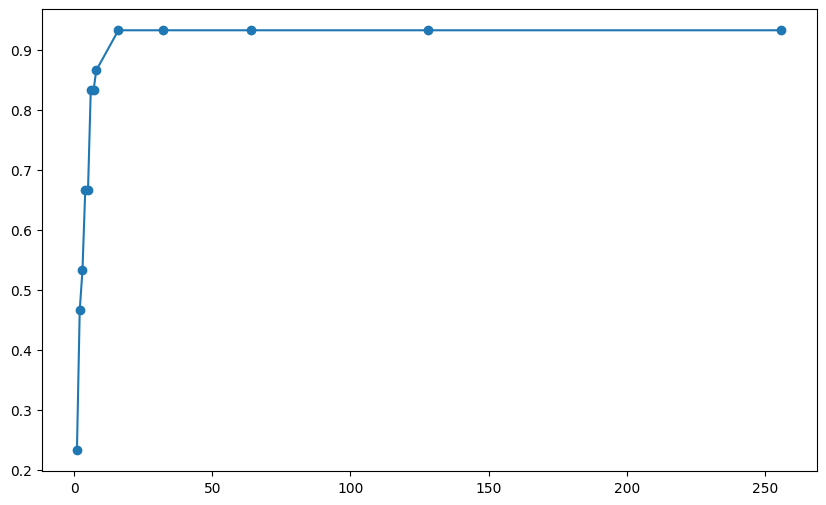

In [22]:
# 测试不同压缩维度对准确率的影响
dimensions = [1, 2, 3, 4, 5, 6, 7, 8, 16, 32, 64, 128, 256]

accuracies_pca = []
accuracies_lda = []

X_train_meaned = train_data - np.mean(train_data, axis=0)
X_test_meaned = test_data - np.mean(test_data, axis=0)

for dim in dimensions:

    X_train_pca = np.dot(X_train_meaned, pca_components[:dim].T)
    X_test_pca = np.dot(X_test_meaned, pca_components[:dim].T)

    # 对PCA降维的数据进行测试
    knn_pca = KNN(k=5)
    knn_pca.fit(X_train_pca, train_label)
    predictions_pca = knn_pca.predict(X_test_pca)

    accuracy_pca = accuracy_score(test_label, predictions_pca)
    accuracies_pca.append(accuracy_pca)
    print(f'Accuracy with {dim} dimensions: {accuracy_pca * 100:.2f}%')

print('-----------------------------------')

for dim in dimensions:
    # 对LDA降维的数据进行测试
    X_train_lda = np.dot(X_train_meaned, lda_components[:, :dim])
    X_test_lda = np.dot(X_test_meaned, lda_components[:, :dim])

    knn_lda = KNN(k=5)
    knn_lda.fit(X_train_lda, train_label)
    predictions_lda = knn_lda.predict(X_test_lda)

    accuracy_lda = accuracy_score(test_label, predictions_lda)
    accuracies_lda.append(accuracy_lda)
    print(f'Accuracy with {dim} dimensions: {accuracy_lda * 100:.2f}%')

# 绘制准确率随压缩维度变化的图
plt.figure(figsize=(10, 6))
plt.plot(dimensions, accuracies_pca, marker='o', label='PCA')
plt.plot(dimensions, accuracies_lda, marker='x', label='LDA')
plt.xlabel('Number of dimensions')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of dimensions')
plt.legend()
plt.show()
plt.savefig('Accuracy vs Number of dimensions.png')

In [23]:
from sklearn import svm

# 测试不同压缩维度对准确率的影响
dimensions = [1, 2, 3, 4, 5, 6, 7, 8, 16, 32, 64, 128, 256]
accuracies_pca = []
accuracies_lda = []

X_train_meaned = train_data - np.mean(train_data, axis=0)
X_test_meaned = test_data - np.mean(test_data, axis=0)

for dim in dimensions:

    X_train_pca = np.dot(X_train_meaned, pca_components[:dim].T)
    X_test_pca = np.dot(X_test_meaned, pca_components[:dim].T)

    # 使用SVM进行训练和预测
    clf = svm.SVC(kernel='linear', C=1)
    clf.fit(X_train_pca, train_label)
    predictions_pca = clf.predict(X_test_pca)

    accuracy_pca = accuracy_score(test_label, predictions_pca)
    accuracies_pca.append(accuracy_pca)
    print(f'Accuracy with {dim} dimensions: {accuracy_pca * 100:.2f}%')



# 绘制准确率随压缩维度变化的图
plt.figure(figsize=(10, 6))
plt.plot(dimensions, accuracies_pca, marker='o', label='PCA')
plt.xlabel('Number of dimensions')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Number of dimensions')
plt.legend()
plt.show()
plt.savefig('Accuracy vs Number of dimensions.png')

Accuracy with 1 dimensions: 30.00%
Accuracy with 2 dimensions: 36.67%
Accuracy with 3 dimensions: 43.33%


KeyboardInterrupt: 

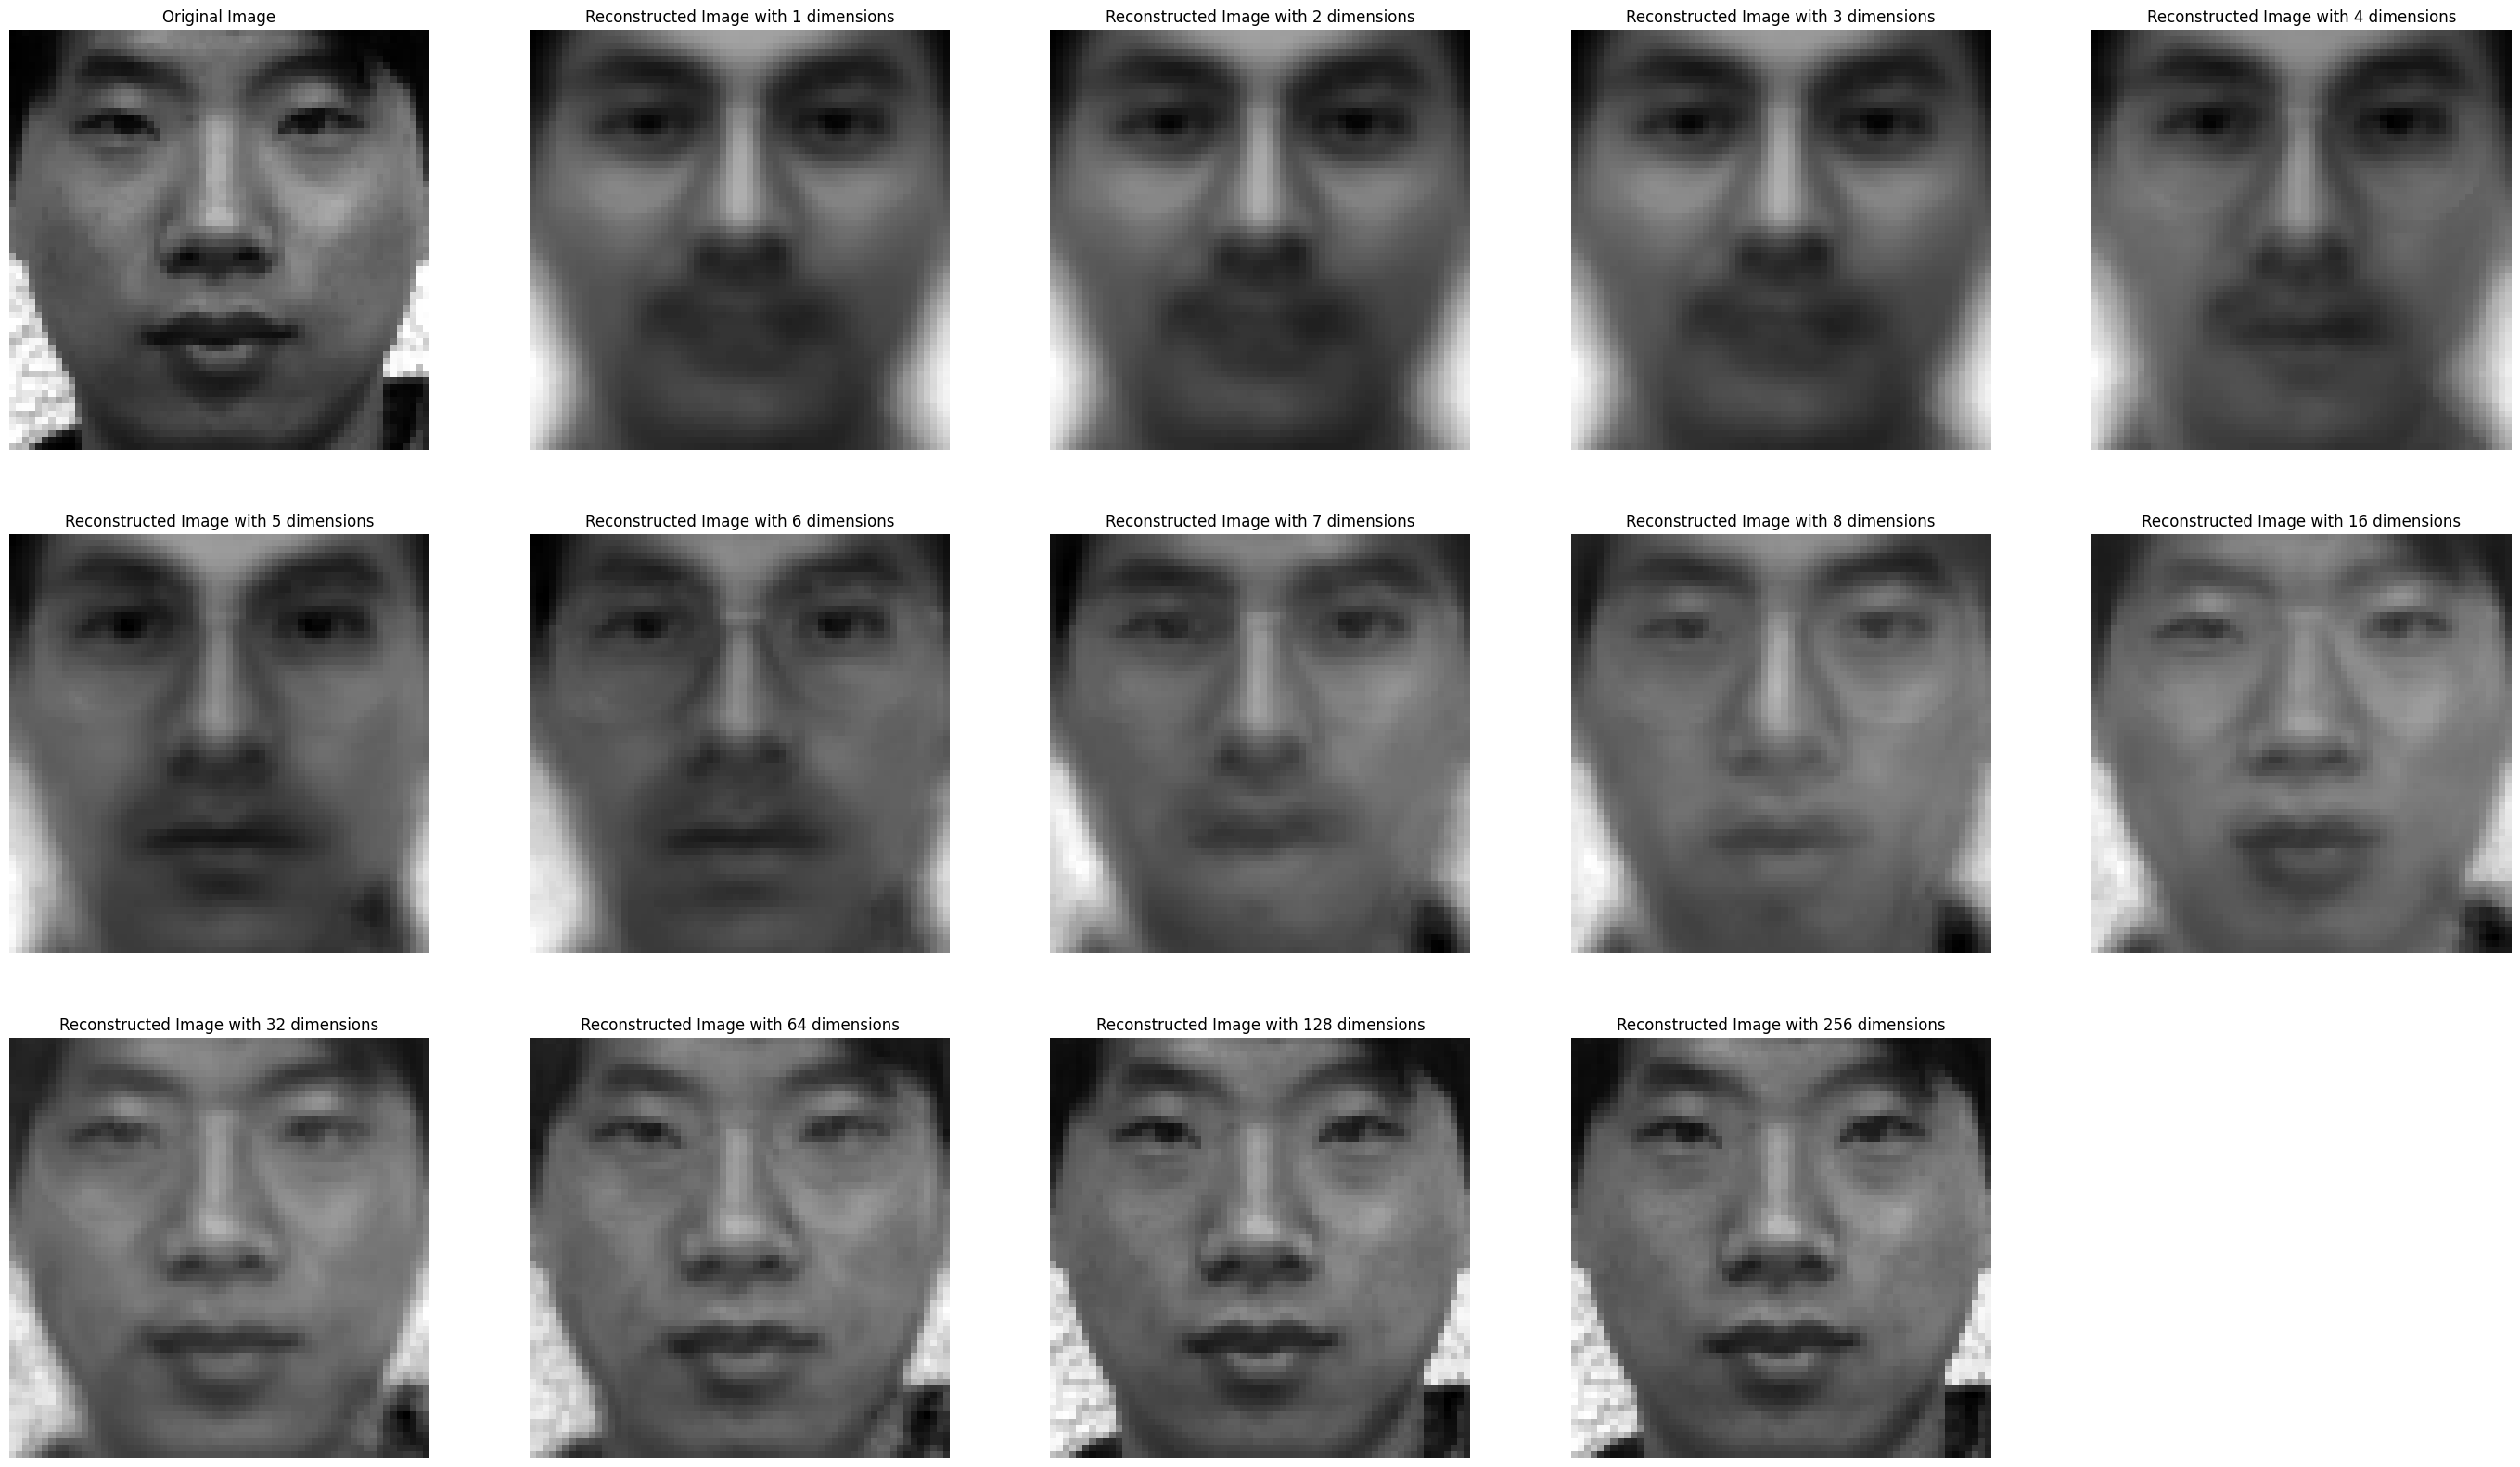

In [78]:
def reconstruct(X_pca, components, mean):
    return np.dot(X_pca, components) + mean

dims=[1, 2, 3, 4, 5, 6, 7, 8, 16, 32, 64, 128, 256]

# 图片序号
image_index = 6
# 展示原图
original_image = test_data[image_index].reshape(64, 64)

plt.figure(figsize=(35, 20))
plt.subplot(3, 5, 1)
plt.imshow(np.rot90(original_image, -1), cmap='gray')
plt.title('Original Image')
plt.axis('off')

for dim in dims:
    X_test_pca = np.dot(X_test_meaned, pca_components[:dim].T)  # PCA降维
    X_reconstructed = reconstruct(X_test_pca, pca_components[:dim], np.mean(train_data, axis=0)) # 重构图像

    # 展示特定维度下的重构图像
    reconstructed_image = X_reconstructed[image_index].reshape(64, 64)

    plt.subplot(3, 5, dims.index(dim) + 2)
    plt.imshow(np.rot90(reconstructed_image, -1), cmap='gray')
    plt.title(f'Reconstructed Image with {dim} dimensions')
    plt.axis('off')

In [79]:
from sklearn.decomposition import LatentDirichletAllocation as LDA

# 使用库函数进行LDA降维
X_train_lda2 = LDA(n_components=256).fit_transform(train_data, train_label)

In [80]:
X_train_lda2.shape

(135, 256)

In [81]:
# 投影矩阵的维度
lda_components.shape

(4096, 4096)